# Dependencies

In [ ]:
!git clone https://github.com/Kartik-3004/facexformer.git

Cloning into 'facexformer'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 111 (delta 54), reused 33 (delta 5), pack-reused 0
Receiving objects: 100% (111/111), 8.45 MiB | 4.28 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [ ]:
%cd facexformer

!pip install torch==2.0.1+cu117 torchvision==0.15.2+cu117 torchaudio==2.0.2+cu117 --extra-index-url https://download.pytorch.org/whl/cu117
!pip install -r requirements.txt

/content/facexformer
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 533.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.0/161.0 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for lit: filename=lit-18.1.2-py3-none-any.whl size=96368 sha256=ef09f41572931e7fa4f9a903fc5709be2d665d3805e6786bac9ca85c6fcb07c5
  Stored in directory: /root/.cache/pip/wheels/f4/4d/9c/3e28d23c2c6fc6a9bd89c91a7b7ff775fc71a41ac9a52563e9
Successfully built lit
  Attempting uninstall: triton
    Found 

In [ ]:
!pip install facenet_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.7 MB/s eta 0:00:00


In [ ]:
import os
os.getcwd()

'/content/facexformer'

# Downloading Model

In [ ]:
from huggingface_hub import hf_hub_download

hf_hub_download(repo_id="kartiknarayan/facexformer", filename="ckpts/model.pt", local_dir="./")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.pt:   0%|          | 0.00/1.10G [00:00<?, ?B/s]

'./ckpts/model.pt'

# inference

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_and_remove_png_images(folder_path):
    # Check if the provided path is a valid directory
    if not os.path.isdir(folder_path):
        print(f"The provided path: {folder_path} is not a valid directory.")
        return

    # List all PNG files in the directory
    png_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]

    # Deal with no PNG files found
    if not png_files:
        print("No PNG images found in the folder.")
    else:
        # Custom sort for PNG files
        priority_files = ['face.png', 'landmarks.png']
        png_files = sorted(png_files, key=lambda x: (x not in priority_files, x))

        # Display PNG images
        fig, axes = plt.subplots(1, len(png_files))
        if len(png_files) == 1:
            axes = [axes]
        for ax, file_name in zip(axes, png_files):
            file_path = os.path.join(folder_path, file_name)
            img = mpimg.imread(file_path)
            ax.imshow(img)
            ax.set_title(file_name, fontsize=8)
            ax.axis('off')
        plt.tight_layout()
        plt.show()

    # Display content of TXT files
    txt_files = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
    for file_name in txt_files:
        if not file_name == 'landmarks.txt':
            print(f"{'='*20}\n{file_name[:-4]}\n{'='*20}")  # Print the file name as the heading
            with open(os.path.join(folder_path, file_name), 'r') as file:
                print(file.read())
                print()

    # Add/remove further functionality as needed

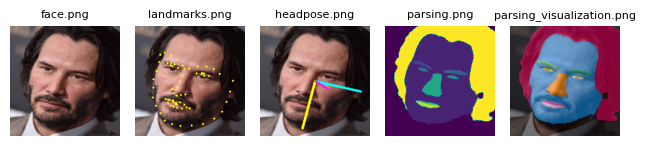

headpose
Pitch: -9.690734719890267 
Yaw: 15.355424678800274 
Roll: 15.318977081841794

visibility
1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0

age_gender_race
Age: 3 
Gender: 0 
Race: 0

attribute
0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1



In [ ]:
import subprocess
from inference import test
import argparse
import glob
import shutil

tasks = ["parsing", "landmarks", "headpose", "attributes", "age_gender_race", "visibility"]
# image_paths = [y for x in ['jpg', 'jpeg', 'png', 'bmp', 'gif', 'tiff'] for y in glob.glob('/content/images/*.{}'.format(x))]

image_paths = ['/content/gettyimages-633589284-612x612.jpg']

flag = 0

if flag == 1:
    # Remove the folder and its contents
    shutil.rmtree("/content/results")
    print("The input folder and its contents have been removed.")

results_path = "/content/results"
os.makedirs(results_path, exist_ok=True)


for image_path in image_paths:
    for task in tasks:
        flag = 1
        args = {
            "model_path": "ckpts/model.pt",
            "image_path": image_path,
            "results_path": results_path,
            "task": task,
            "gpu_num": "0"
        }
        args_namespace = argparse.Namespace(**args)
        test(args_namespace)

    display_and_remove_png_images('/content/results')
